In [36]:
import pandas as pd
from pathlib import Path
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv(Path('./second_dataset.csv'))
df = pd.DataFrame(data)

In [38]:
df1 = df.drop(columns=['key', 'mode', 'time_signature'])

In [39]:
df1.head()

,artist_name,track_id,track_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration
0,Justin Bieber Daniel Caesar Giveon,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),0.3210,0.677,0.696,0.000000,0.420,-6.181,0.1190,90.030,0.464,100,198.0
1,Olivia Rodrigo,7lPN2DXiMsVn7XUKtOW1CS,drivers license,0.7210,0.585,0.436,0.000013,0.105,-8.761,0.0601,143.874,0.132,99,242.0
2,Masked Wolf,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,0.1750,0.778,0.695,0.000000,0.150,-6.865,0.0913,149.996,0.472,98,133.0
3,Kali Uchis,6tDDoYIxWvMLTdKpjFkc1B,telepatía,0.1120,0.653,0.524,0.000000,0.203,-9.016,0.0502,83.970,0.553,97,160.0
4,The Weeknd,5QO79kh1waicV47BqGRL3g,Save Your Tears,0.0212,0.680,0.826,0.000012,0.543,-5.487,0.0309,118.051,0.644,97,216.0


In [67]:
corr = df1.corr(method="pearson")

In [77]:
upper_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
clean_corr = upper_corr.unstack().dropna()

/var/folders/vq/991z51mx6xg65640yx8wj_vh0000gn/T/ipykernel_12716/682316972.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


In [79]:
sorted_cor = clean_corr.sort_values()
print(sorted_cor)

energy            acousticness       -0.617920
loudness          instrumentalness   -0.558293
                  acousticness       -0.520052
instrumentalness  danceability       -0.290993
                  energy             -0.277011
danceability      acousticness       -0.242165
valence           instrumentalness   -0.189097
duration          danceability       -0.180750
valence           acousticness       -0.178079
popularity        instrumentalness   -0.139521
tempo             acousticness       -0.133763
duration          speechiness        -0.124538
speechiness       instrumentalness   -0.101244
                  acousticness       -0.087965
liveness          danceability       -0.075300
                  acousticness       -0.074943
tempo             instrumentalness   -0.067088
duration          valence            -0.064922
                  instrumentalness   -0.047082
popularity        acousticness       -0.045899
                  speechiness        -0.045055
duration     

Text(0.5, 1.0, 'Correlation Heatmap')

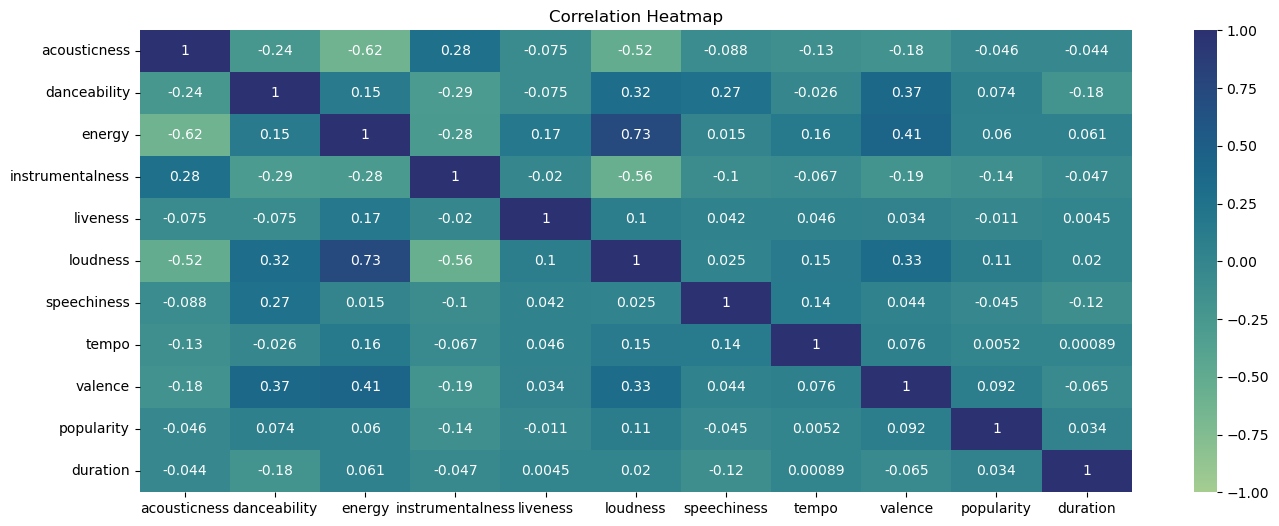

In [81]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(df1.corr(method='pearson'),cmap="crest",vmin=-1, vmax=1, annot=True, linecolor='Black')
ax.set(xlabel="", ylabel="")
ax.set_title("Correlation Heatmap", fontdict={'fontsize':12})